In [1]:
# Import library yang dibutuhkan 
import os 
import shutil 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
import yaml 
from PIL import Image 
from IPython.display import Video  # Diperbaiki: sebelumnya tertulis salah 
from ultralytics import YOLO 
import torch
 
# Konfigurasi tampilan visual seaborn 
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid') 



image 1/72 C:\Users\user\Vehicle Detection.v2i.yolov8\dataset\test\images\ch24_20231218062918-mp4_frame_0_jpg.rf.ee9c45eb38fc3dcec1840e0f045b35b0.jpg: 544x640 1 person, 1 car, 48.8ms
image 2/72 C:\Users\user\Vehicle Detection.v2i.yolov8\dataset\test\images\ch24_20231219063618-mp4_frame_7500_jpg.rf.2b23d6795a5b5ec373d80acf9b1ae513.jpg: 544x640 3 cars, 7.5ms
image 3/72 C:\Users\user\Vehicle Detection.v2i.yolov8\dataset\test\images\ch24_20231220055959-mp4_frame_0_jpg.rf.9792bdc0981dbdffcf9f50ccb9c46ab7.jpg: 544x640 1 person, 2 cars, 3 buss, 7.4ms
image 4/72 C:\Users\user\Vehicle Detection.v2i.yolov8\dataset\test\images\ch24_20231220061053-mp4_frame_7500_jpg.rf.485d19e1494b1755080a378e3268e959.jpg: 544x640 2 cars, 1 bus, 7.3ms
image 5/72 C:\Users\user\Vehicle Detection.v2i.yolov8\dataset\test\images\ch24_20231221063350-mp4_frame_15000_jpg.rf.c4cb87918f42e40af52a24c340f58f5f.jpg: 544x640 (no detections), 7.3ms
image 6/72 C:\Users\user\Vehicle Detection.v2i.yolov8\dataset\test\images\ch24_2

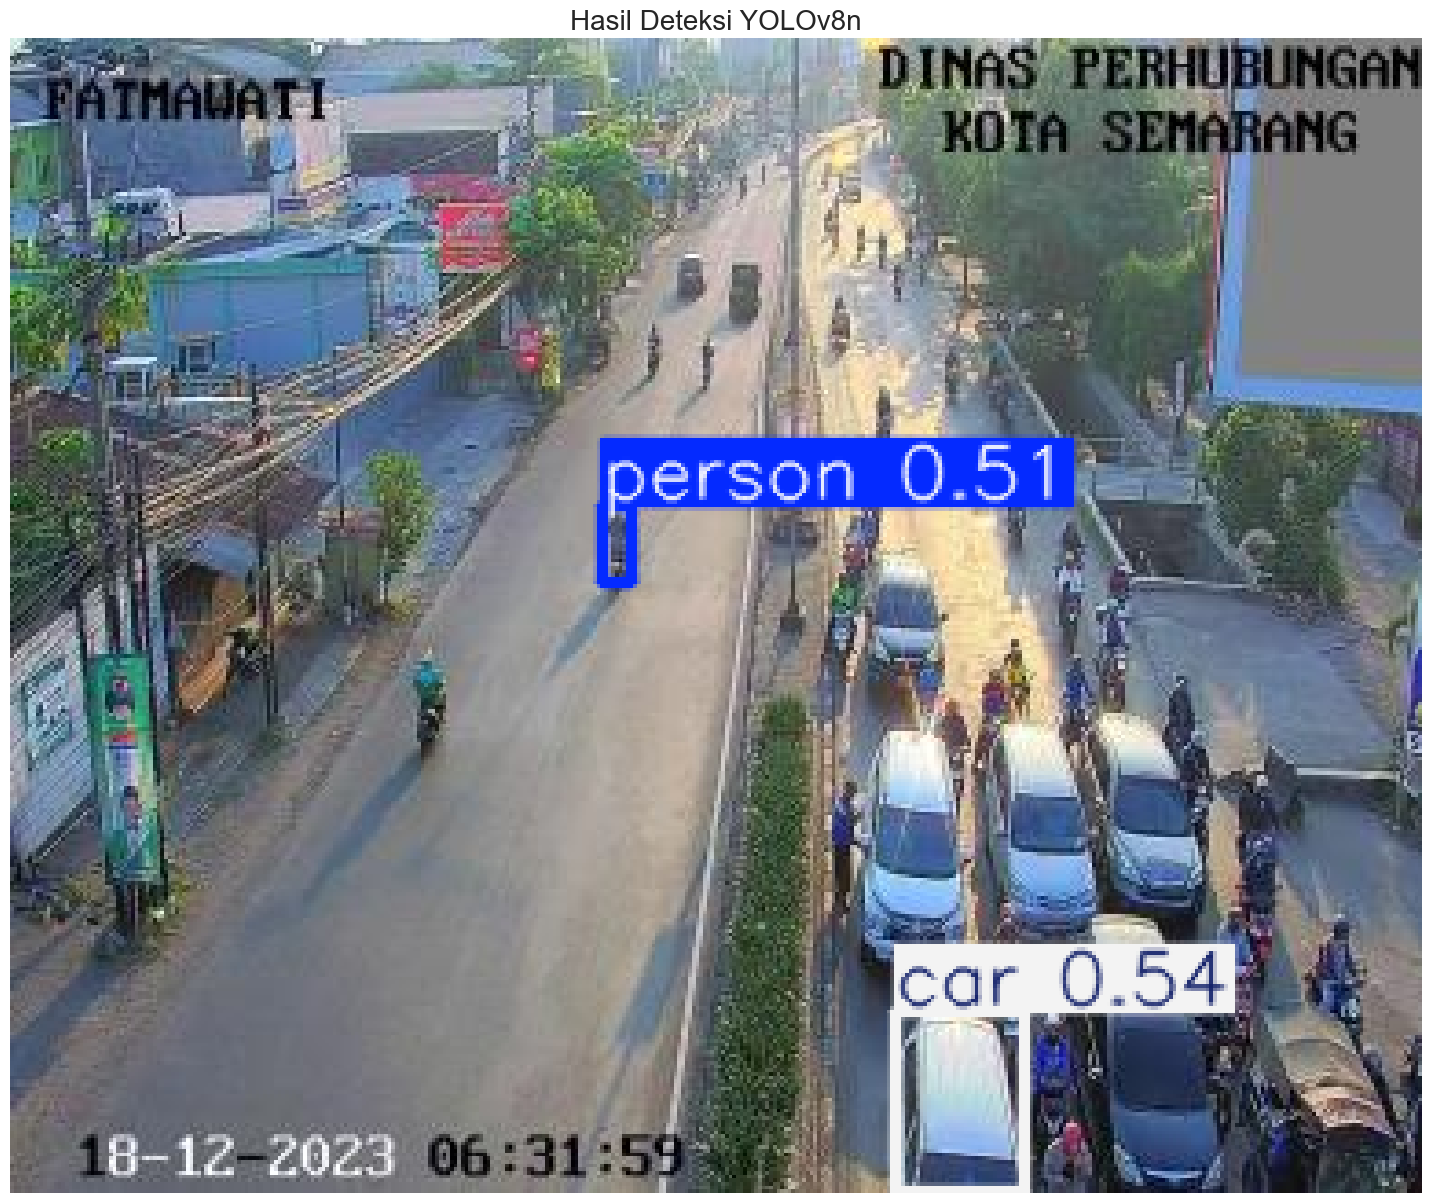

In [2]:
model = YOLO('yolov8n.pt')

# Uji dengan 1 gambar dari test/images
image_path = './dataset/test/images/'  # Ganti dengan nama file yang ada

results = model.predict(source=image_path, imgsz=640, conf=0.5)

sample_image = results[0].plot(line_width=2)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 15))
plt.imshow(sample_image)
plt.title('Hasil Deteksi YOLOv8n', fontsize=20)
plt.axis('off')
plt.show()


In [3]:
yaml_path = './dataset/data.yaml'

with open(yaml_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))


names:
- bus
- car
- motorcycle
- truck
nc: 4
roboflow:
  license: CC BY 4.0
  project: vehicle-detection-oayhk
  url: https://universe.roboflow.com/yolo-project-kz7ey/vehicle-detection-oayhk/dataset/2
  version: 2
  workspace: yolo-project-kz7ey
test: ../test/images
train: ../train/images
val: ../valid/images



In [4]:
train_path = './dataset/train/images'
valid_path = './dataset/valid/images'

def cek_gambar(path):
    ukuran = set()
    jumlah = 0
    for f in os.listdir(path):
        if f.endswith('.jpg') or f.endswith('.png'):
            jumlah += 1
            with Image.open(os.path.join(path, f)) as img:
                ukuran.add(img.size)
    return jumlah, ukuran

num_train, size_train = cek_gambar(train_path)
num_valid, size_valid = cek_gambar(valid_path)

print(f"Jumlah gambar train: {num_train}, Ukuran unik: {size_train}")
print(f"Jumlah gambar valid: {num_valid}, Ukuran unik: {size_valid}")


Jumlah gambar train: 504, Ukuran unik: {(385, 315)}
Jumlah gambar valid: 144, Ukuran unik: {(385, 315)}


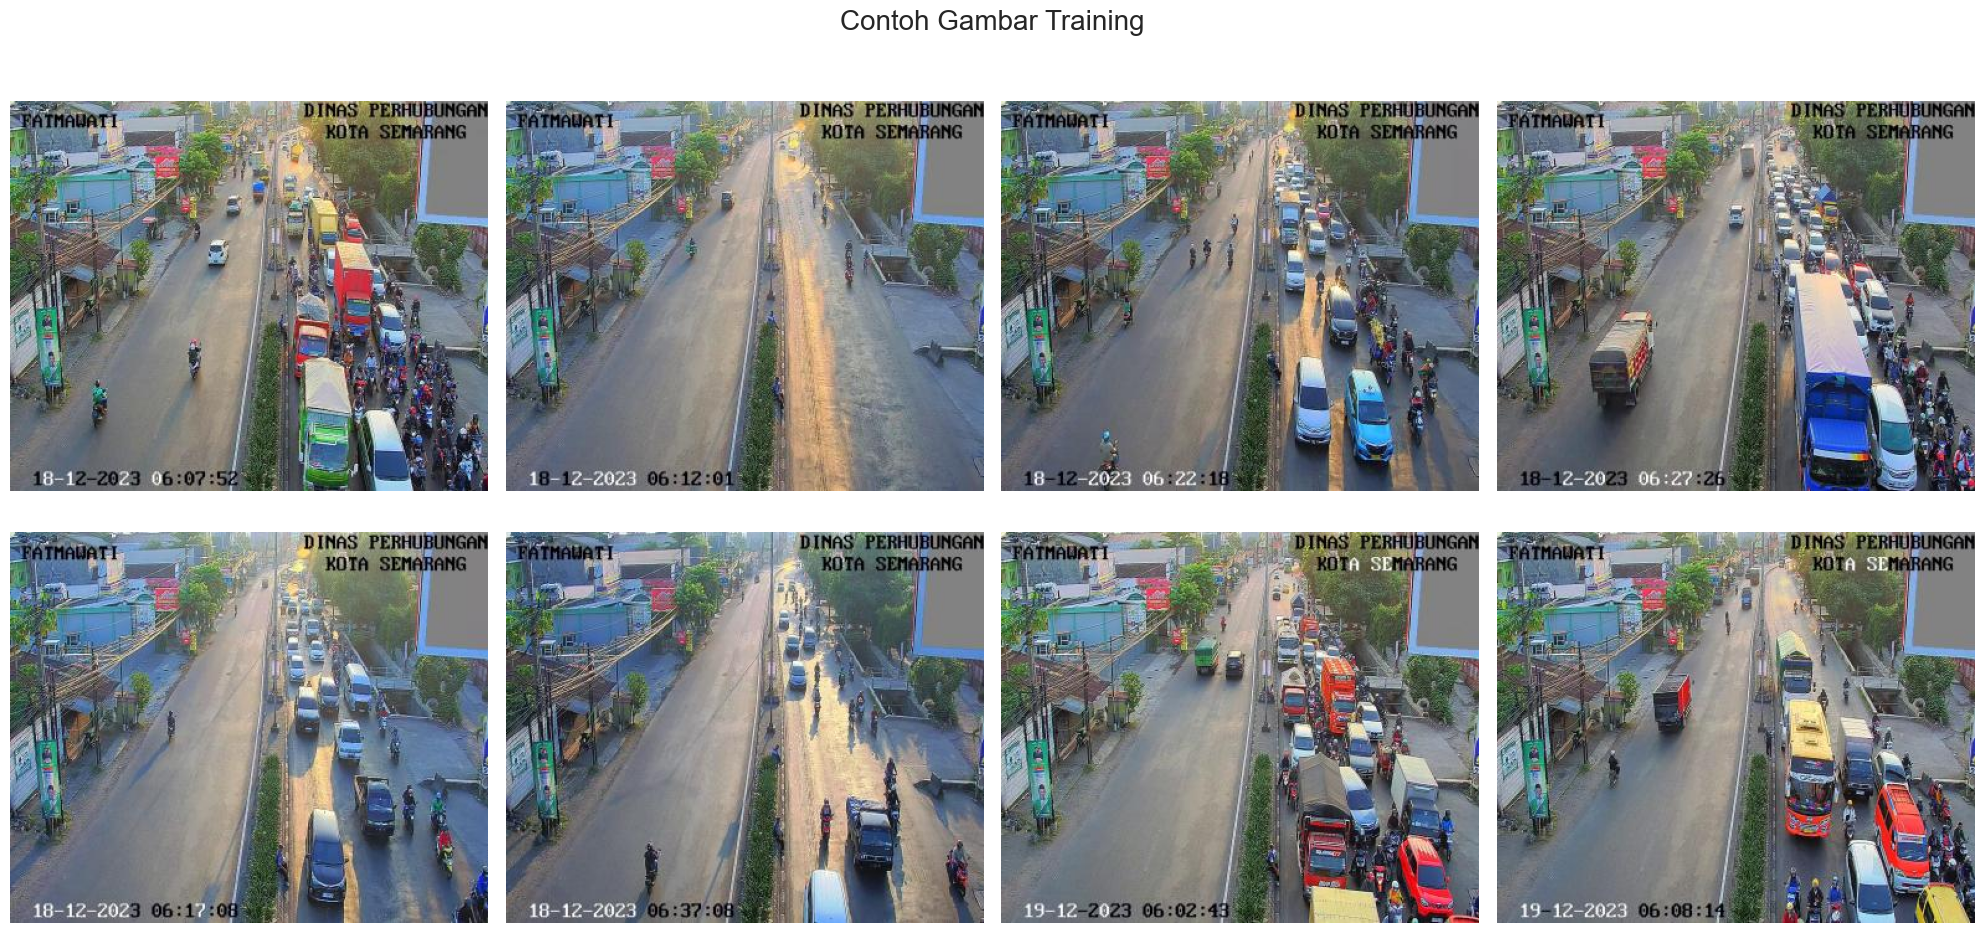

In [5]:
img_list = [f for f in os.listdir(train_path) if f.endswith(('.jpg', '.png'))]
sampled = img_list[:8]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for ax, f in zip(axes.ravel(), sampled):
    img = Image.open(os.path.join(train_path, f))
    ax.imshow(img)
    ax.axis('off')
plt.suptitle("Contoh Gambar Training", fontsize=20)
plt.tight_layout()
plt.show()


In [6]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  


results = model.train(
    data="data.yaml",    
    epochs=150,
    imgsz=640,
    batch=16,
    patience=30,
    optimizer="SGD",    
    lr0=1e-4,
    device=0             
)


Ultralytics 8.3.160  Python-3.13.5 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning C:\Users\user\Vehicle Detection.v2i.yolov8\train\labels.cache... 504 images, 0 backgrounds, 0 corrupt: 


val: Fast image access  (ping: 0.10.0 ms, read: 3.31.6 MB/s, size: 29.5 KB)


val: Scanning C:\Users\user\Vehicle Detection.v2i.yolov8\valid\labels.cache... 144 images, 0 backgrounds, 0 corrupt: 10

val: C:\Users\user\Vehicle Detection.v2i.yolov8\valid\images\ch24_20231226060000-mp4_frame_15000_jpg.rf.26743afa446c4a0a38aa23948accbe86.jpg: 1 duplicate labels removed


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.31G      2.507      4.003      1.661        799        640: 100%|██████████| 32/32 [00:07<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487    0.00749      0.172     0.0104    0.00456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.47G      2.361      3.619      1.508        971        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487    0.00772      0.163     0.0116    0.00552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.48G       2.29      3.361      1.446        606        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487     0.0274       0.23     0.0459     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      4/150      5.16G      2.264      3.211      1.406       1161        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487     0.0417      0.275     0.0787     0.0355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      5/150      6.14G      2.244      3.053      1.374        570        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487     0.0494      0.292      0.106     0.0481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      6/150      4.64G      2.247      2.825      1.361       1160        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487     0.0537      0.287      0.122     0.0545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      7/150      4.64G      2.228      2.562      1.348        840        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.699      0.133      0.129     0.0572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      8/150      4.64G      2.254       2.29      1.367        860        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.684      0.165      0.134      0.059

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      9/150      6.32G      2.249       2.05      1.331        710        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.702      0.174      0.154     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.64G      2.271      1.924      1.346        429        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487       0.73      0.177      0.178     0.0795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.45G      2.238      1.824      1.347        664        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.757      0.184      0.203      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.45G      2.225       1.73       1.32        957        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.773      0.188      0.216     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.46G      2.221      1.673      1.312       1247        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.776      0.198      0.227      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.46G      2.208      1.645      1.323        633        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.779      0.203      0.232      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.46G      2.196      1.611      1.313        747        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.784      0.205       0.24      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.47G      2.193      1.583      1.301        632        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.791      0.207      0.246      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.47G      2.149      1.544      1.288        713        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.797      0.212      0.259      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      6.37G      2.161      1.539      1.315        633        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.555      0.212      0.268      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.88G      2.176      1.511      1.296        854        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.561       0.21      0.272      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.88G       2.18      1.479      1.306        852        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.666      0.216      0.284      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.88G      2.145       1.46      1.298        807        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.581      0.238      0.295       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.74G      2.147      1.445      1.285        591        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.538      0.239      0.303      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.74G      2.149       1.45      1.281       1175        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.403      0.334      0.311      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.74G      2.124      1.423      1.283        379        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.445      0.345      0.322      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.75G      2.102      1.399      1.272        857        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.471      0.345      0.326      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.75G      2.144      1.413       1.28        849        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.497       0.34      0.333      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/150      4.75G      2.118      1.377       1.27        728        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.516      0.333      0.337      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.76G      2.125      1.366      1.265       1041        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.522      0.337      0.342      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.76G      2.126      1.351      1.284        703        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.509      0.349      0.343      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.76G      2.128      1.356      1.281        722        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.53      0.336      0.347       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.77G      2.098      1.342      1.261        846        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.549      0.343      0.349      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.77G      2.082      1.337      1.279        911        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541      0.345      0.356      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.77G      2.105      1.331      1.267        580        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.529       0.35      0.355      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.78G      2.099      1.323       1.26       1094        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.546      0.348      0.358      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.64G      2.071      1.296      1.253        749        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.559      0.343       0.36      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.64G      2.091      1.302      1.255        642        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.555      0.347      0.363      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.65G      2.102      1.308       1.26        864        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.562      0.345      0.365       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.65G      2.067      1.296      1.265        667        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.554      0.354      0.367      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.65G      2.089      1.297      1.259        925        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487       0.54      0.356      0.366      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      6.61G      2.072      1.293      1.267        553        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.551      0.359      0.369      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.75G      2.073      1.267      1.265        805        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.53      0.371       0.37      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.75G      2.096      1.287      1.265        856        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.511      0.378      0.369      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.75G       2.07      1.285      1.263        536        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.543      0.369      0.372      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.75G      2.103       1.27      1.273        878        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.559      0.366      0.371      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.75G      2.107       1.28      1.272       1206        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.547       0.37      0.373      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.75G      2.088       1.27      1.267       1038        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.547      0.361      0.374      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.65G      2.068      1.251      1.251        590        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.559      0.363      0.376      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.65G      2.078      1.251      1.262        916        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.569      0.361      0.378      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.65G      2.067      1.248      1.252        519        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.584      0.359       0.38      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.65G      2.067      1.254      1.259        611        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.572      0.365      0.381      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/150      5.65G      2.097      1.254      1.253        901        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.59      0.357      0.382      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.65G      2.062      1.256      1.278        533        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.589      0.357      0.383      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.66G      2.075      1.255       1.27        753        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.587      0.358       0.38      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.66G      2.057      1.244      1.256        759        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.586       0.36      0.379      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.66G      2.064      1.246      1.244        792        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.591       0.36      0.383      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.67G      2.065      1.238      1.258       1190        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.586      0.361      0.382      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.67G      2.036      1.229      1.239        453        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.577      0.363      0.383      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.68G      2.058      1.235      1.242        760        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.579      0.365      0.383      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.69G      2.052      1.237      1.243        788        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.576      0.363      0.385      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.69G      2.034      1.226      1.242        784        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.587      0.359      0.385      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.69G       2.04      1.232      1.247        872        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.58      0.361      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       5.7G      2.083      1.238      1.259        901        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.608      0.358      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150       5.7G       2.07      1.232      1.254        795        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.59      0.363      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       5.7G      2.043      1.225      1.251        772        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.576      0.368      0.387      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.71G      2.048      1.234      1.258        992        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.552      0.374      0.388      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.71G      2.048      1.216      1.245        615        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.565      0.368      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.71G      2.044      1.223      1.247        644        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.559      0.371      0.387      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.72G      2.052      1.207      1.238        765        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.561      0.371      0.385      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.72G      2.027       1.21      1.232        793        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.543      0.381      0.388      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.62G      2.066      1.219      1.254        621        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541      0.381      0.387      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.13G      2.043      1.215      1.248        597        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545      0.385      0.387      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      6.62G      2.034      1.204      1.249        495        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.548      0.384      0.387      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.48G      2.028      1.209      1.233        897        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.54      0.389      0.388      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.49G      2.057      1.212      1.246       1073        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.544      0.381       0.39      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     75/150      5.49G      2.031      1.209      1.239        675        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.544      0.387      0.388      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      6.35G      2.045      1.212       1.25        457        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.55      0.378       0.39      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.68G      2.016      1.204      1.242        718        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.542      0.384       0.39      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.68G      2.041      1.202      1.232        639        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545      0.385       0.39      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.68G      2.027      1.205      1.229        542        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.537      0.389      0.389      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       5.7G      2.029      1.186      1.235        991        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.543      0.383      0.388      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150       5.7G      2.046      1.196      1.246        788        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.535      0.381      0.389      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       5.7G      2.058      1.209      1.249        852        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.539      0.386      0.388      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.71G      2.029      1.193      1.236        876        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545      0.388       0.39      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.71G      2.023      1.199       1.25        853        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545       0.39      0.391       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.71G      2.028        1.2      1.241        519        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.539      0.379       0.39      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.72G      2.031      1.192      1.238        883        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.548      0.378      0.391      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.72G      2.055        1.2      1.244        383        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.538      0.382      0.391      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.72G      2.056      1.207      1.248       1125        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.552      0.373       0.39      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.73G      2.023      1.201      1.234        677        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.554      0.372      0.392       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.73G      2.023      1.191      1.239        811        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.511      0.399      0.393       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.73G      2.024      1.179      1.224        868        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.571      0.372      0.391      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.74G      2.016      1.187      1.237        767        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.586      0.364      0.394      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.74G      2.046      1.193      1.233        696        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.584      0.369      0.394      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.74G      2.025      1.191      1.235        676        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.576      0.366      0.395      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.75G      2.037      1.178      1.237        663        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.579      0.363      0.396      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.75G      2.009      1.179      1.226        664        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.589      0.365      0.394      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.76G      2.025      1.199      1.236        930        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.579      0.369      0.393      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.77G      2.032      1.183      1.224        646        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.575      0.372      0.396      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.77G      2.014      1.185      1.241       1009        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.579      0.369      0.395      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.77G       2.02      1.178      1.233        544        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.589      0.367      0.395      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.78G       2.02      1.182      1.227        669        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.553      0.378      0.395      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.78G      2.023      1.184      1.234        724        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.504      0.409      0.396      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.78G       2.03      1.176      1.241        567        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.54      0.382      0.396      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.79G          2      1.177       1.24        725        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.529       0.39      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.79G      2.016      1.175      1.232        749        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.595      0.361      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.79G      2.022       1.17      1.233        764        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.542      0.384      0.395       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       5.8G      2.013      1.184      1.236        537        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.54      0.386      0.396      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       5.8G      2.031      1.185      1.236        835        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.537      0.386      0.397      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       5.8G      2.012      1.173      1.239        914        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541      0.384      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.81G      2.037       1.18      1.233        515        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545      0.385      0.396      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.81G      1.991      1.165      1.206       1059        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.54      0.385      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.81G      2.004      1.163      1.227        777        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.515      0.408      0.397      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.82G      2.001      1.169      1.223       1234        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.52      0.409      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.82G      2.009      1.162      1.235       1041        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.532      0.401      0.397      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.83G      2.016      1.155      1.225        591        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541       0.39      0.397      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.83G      2.017      1.183      1.245        445        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487       0.54      0.393      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.83G      2.025      1.176       1.24        563        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.536      0.395      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.83G      2.017      1.168       1.24        545        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.542      0.392      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.83G      2.031      1.172       1.23        618        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.543      0.391      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.83G      2.015      1.171      1.224        850        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.538      0.394      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.83G      2.049      1.186      1.242        787        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545      0.393      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.83G      1.998      1.161      1.217        579        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.546      0.392      0.399      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.83G      2.026      1.164      1.232        736        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541      0.403      0.399      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.83G      2.013      1.175      1.234       1014        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        144       8487      0.543      0.401      0.401      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.83G      2.012      1.173      1.226        263        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.545      0.396        0.4      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.83G      2.018      1.176      1.235        993        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541      0.397        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.83G      2.038      1.182      1.229        293        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.546      0.397        0.4      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.83G      2.026      1.172      1.234        866        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.544      0.396        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.83G      2.011      1.164       1.22       1063        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.548      0.393      0.401      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.83G       2.01      1.159      1.228       1370        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.549      0.392      0.402      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.83G      2.022      1.173      1.236        594        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.542      0.395      0.401      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.83G      2.023      1.168      1.241        665        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.544      0.394      0.401      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.83G      2.023      1.161      1.243        772        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.546      0.401      0.401      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.83G      2.013      1.167      1.234        777        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.543      0.401      0.401      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.83G      2.019      1.171       1.24        923        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.543      0.396      0.401      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.83G      2.003      1.166      1.232        522        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.542      0.396      0.402      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.83G      2.016      1.164      1.219        702        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.554      0.391      0.401      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.83G      2.023      1.174      1.244       1104        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.542      0.395      0.401      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.83G      2.022      1.166      1.229        832        640: 100%|██████████| 32/32 [00:05<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.554      0.389      0.402      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.83G          2      1.166      1.231        384        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.556      0.387      0.403      0.196


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.83G       2.04      1.249       1.27        520        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.514      0.402      0.394      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.83G      2.041      1.231      1.284        566        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.493      0.403      0.391      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.83G      2.029      1.222      1.277        573        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.512      0.392      0.389      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.83G      2.042      1.234      1.276        351        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.519      0.383       0.39      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.83G      2.039      1.218      1.278        552        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.525      0.373       0.39      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.83G      2.025      1.219      1.274        477        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.503      0.391      0.391      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.83G      2.026      1.209      1.266        428        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.523      0.385      0.391      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.83G       2.02      1.201      1.271        637        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.498      0.394      0.391      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.83G      2.025      1.215      1.271        446        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.491      0.394      0.391      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.83G      2.028      1.201      1.275        541        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        144       8487      0.541      0.379      0.391      0.188



150 epochs completed in 0.296 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.160  Python-3.13.5 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<0


                   all        144       8487      0.555      0.387      0.402      0.196
                   bus         44         54       0.27      0.167      0.131     0.0797
                   car        141       2301      0.769      0.603      0.671      0.331
            motorcycle        143       5909      0.562      0.423       0.45      0.167
                 truck         99        223       0.62      0.354      0.357      0.206
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 17.7ms postprocess per image
Results saved to runs\detect\train3


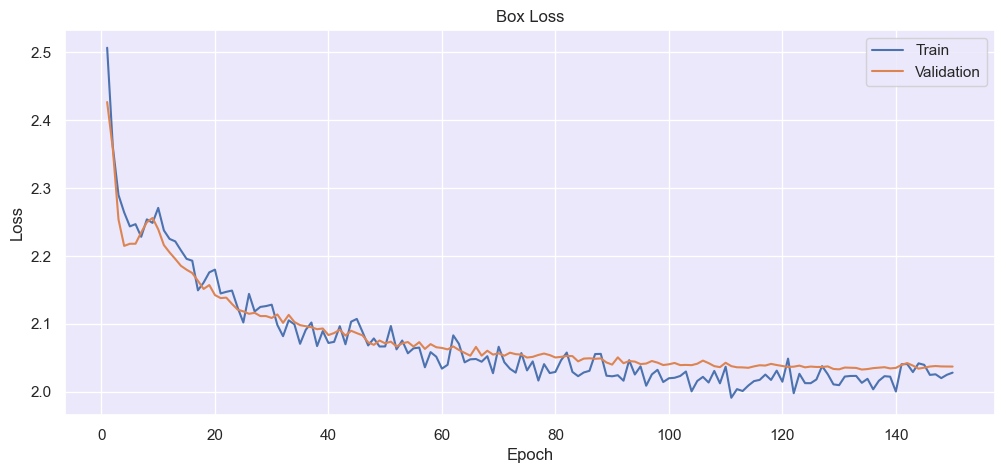

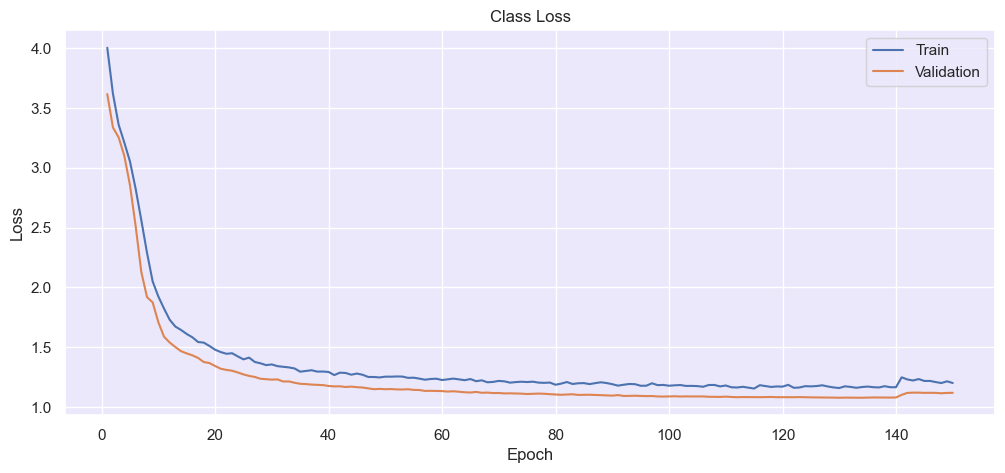

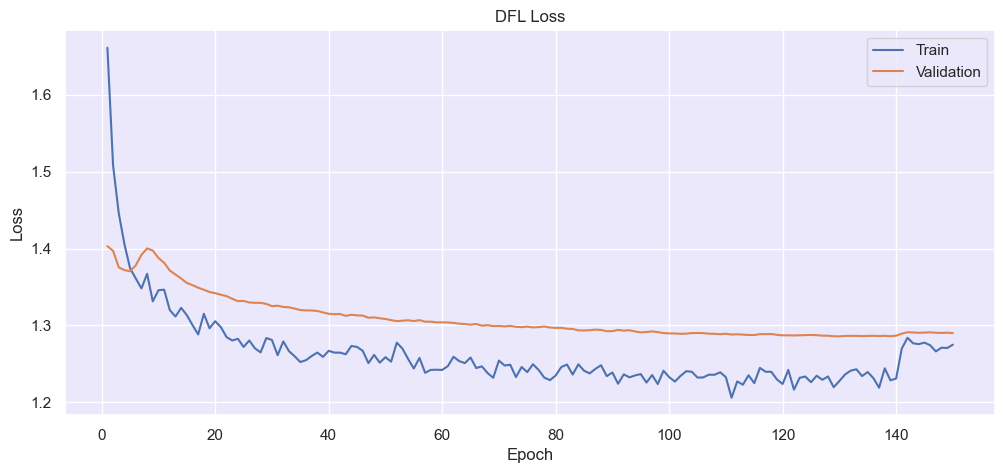

In [7]:
result_dir = 'runs/detect/train3'
csv_path = os.path.join(result_dir, 'results.csv')
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

def plot_loss(df, train_col, val_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_col, label='Train')
    sns.lineplot(data=df, x='epoch', y=val_col, label='Validation')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(df, 'train/box_loss', 'val/box_loss', 'Box Loss')
plot_loss(df, 'train/cls_loss', 'val/cls_loss', 'Class Loss')
plot_loss(df, 'train/dfl_loss', 'val/dfl_loss', 'DFL Loss')


In [8]:
best_model = YOLO(os.path.join(result_dir, 'weights', 'best.pt'))

metrics = best_model.val(split='val')
df_metrics = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
print(df_metrics.round(3))

Ultralytics 8.3.160  Python-3.13.5 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 298.436.6 MB/s, size: 30.0 KB)


val: Scanning C:\Users\user\Vehicle Detection.v2i.yolov8\valid\labels.cache... 144 images, 0 backgrounds, 0 corrupt: 10

val: C:\Users\user\Vehicle Detection.v2i.yolov8\valid\images\ch24_20231226060000-mp4_frame_15000_jpg.rf.26743afa446c4a0a38aa23948accbe86.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<0


                   all        144       8487      0.555      0.387      0.403      0.195
                   bus         44         54       0.27      0.167       0.13     0.0767
                   car        141       2301      0.768      0.601      0.671       0.33
            motorcycle        143       5909      0.563      0.425      0.453      0.168
                 truck         99        223       0.62      0.354      0.357      0.205
Speed: 0.8ms preprocess, 3.8ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to runs\detect\val3
                      Metric Value
metrics/precision(B)         0.555
metrics/recall(B)            0.387
metrics/mAP50(B)             0.403
metrics/mAP50-95(B)          0.195
fitness                      0.216


In [ ]:
from ultralytics import YOLO
import cv2
import os
import glob

# Load model hasil training
model = YOLO("runs/detect/train3/weights/best.pt")

# Path ke folder gambar
folder_path = r"dataset\test\images"  # Ganti sesuai lokasi folder Anda

# Ambil semua file gambar (jpg, png, jpeg)
image_files = glob.glob(os.path.join(folder_path, "*.jpg")) + \
              glob.glob(os.path.join(folder_path, "*.jpeg")) + \
              glob.glob(os.path.join(folder_path, "*.png"))

# Loop untuk semua gambar
for img_path in image_files:
    image = cv2.imread(img_path)
    results = model(img_path)[0]

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf)
        cls = int(box.cls[0])
        label = results.names[cls]

        # Gambar bounding box dan label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    # Tampilkan hasil
    window_name = os.path.basename(img_path)
    cv2.imshow(window_name, image)
    print(f"Menampilkan: {img_path}")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
# Load model
model = YOLO("runs/detect/train3/weights/best.pt")  # Ganti path jika perlu

# Buka video input
video_path = "sample_video.mp4"  # Ganti nama file sesuai video Anda
cap = cv2.VideoCapture(video_path)

# Ambil info video
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# Siapkan video writer untuk menyimpan output
output_path = "hasil_deteksi2.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # codec untuk .mp4
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Deteksi objek
    results = model(frame, imgsz=640)[0]

    # Tambahkan kotak & label pada frame
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf)
        cls = int(box.cls[0])
        label = results.names[cls]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    # Simpan ke file output
    out.write(frame)

    # (Opsional) Tampilkan secara real-time
    cv2.imshow("Deteksi Kendaraan", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    torch.cuda.empty_cache()  # Bebaskan memori GPU

# Bersihkan
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 22.5ms
Speed: 3.5ms preprocess, 22.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.4ms
Speed: 28.8ms preprocess, 27.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.6ms
Speed: 17.5ms preprocess, 26.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.4ms
Speed: 2.8ms preprocess, 42.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inferen